Pyplot tutoriel 

matplotlib.pyplotest une collection de fonctions de commande de style qui rendent le travail de matplotlib comme MATLAB. Chaque pyplotfonction permet un changement à un chiffre: par exemple, crée un personnage, crée une zone de traçage dans une figure, parcelles quelques lignes dans une zone de traçage, orne le terrain avec des étiquettes, etc. Dans matplotlib.pyplotdifférents états sont conservés à travers les appels de fonction, de sorte que il garde la trace des choses comme le chiffre actuel et de la zone de traçage, et les fonctions de traçage sont dirigées vers les axes actuels (s'il vous plaît noter que «axes» ici et dans la plupart des endroits dans la documentation se réfère à l' axe partie d'une figure et non pas la stricte terme mathématique pour plus d'un axe).


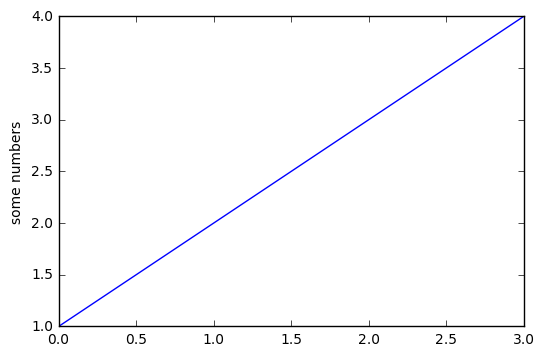

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Vous demandez peut - être pourquoi l'axe des x varie de 0-3 et l'axe des y 1-4. Si vous fournissez une seule liste ou un tableau à la plot()commande, matplotlib suppose qu'il est une séquence de valeurs y, et génère les valeurs de x pour vous automatiquement. Depuis les plages de python commencent avec 0, la valeur par défaut x vecteur a la même longueur que y , mais commence par 0. Par conséquent , les données de x sont [0,1,2,3].

plot()est une commande polyvalente, et prendra un nombre arbitraire d'arguments. Par exemple, pour tracer x par rapport à y, vous pouvez lancer la commande:

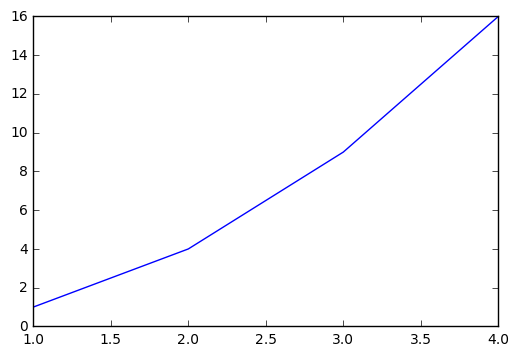

In [4]:
%matplotlib inline
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]) 

Pour chaque paire x, y d'arguments, il y a un troisième argument optionnel qui est la chaîne de format qui indique la couleur et le type de ligne de la parcelle. Les lettres et les symboles de la chaîne de format sont de MATLAB, et vous concaténer une chaîne de couleur avec une chaîne de style de ligne. La chaîne de format par défaut est 'b-', qui est une ligne bleue. Par exemple, pour tracer le dessus avec des cercles rouges, vous taperez

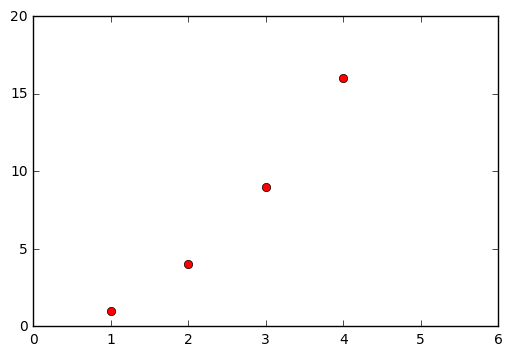

In [5]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Voir la plot()documentation pour une liste complète des styles de ligne et chaînes de format. La axis()commande dans l'exemple ci - dessus prend une liste de et précise la fenêtre des axes.[xmin, xmax, ymin, ymax]

Si matplotlib étaient limités à travailler avec des listes, il serait assez inutile pour le traitement numérique. Généralement, vous allez utiliser numpy tableaux. En fait, toutes les séquences sont converties en numpy réseaux en interne. L'exemple ci - dessous illustre un tracé plusieurs lignes avec différents styles de format en une seule commande à l' aide de tableaux.

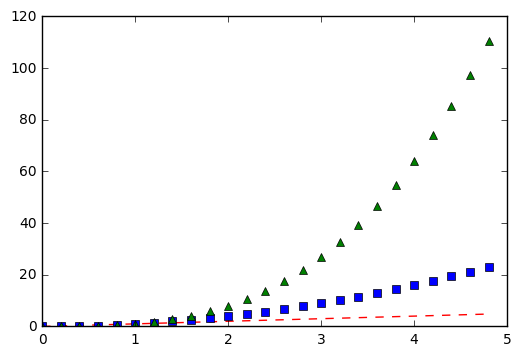

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Contrôle de propriétés de ligne 
Les lignes ont de nombreux attributs que vous pouvez définir: lineWidth style tableau de bord, anti - crénelage, etc; voir matplotlib.lines.Line2D. Il existe plusieurs façons de définir les propriétés de ligne

    Utilisez args mot-clé:

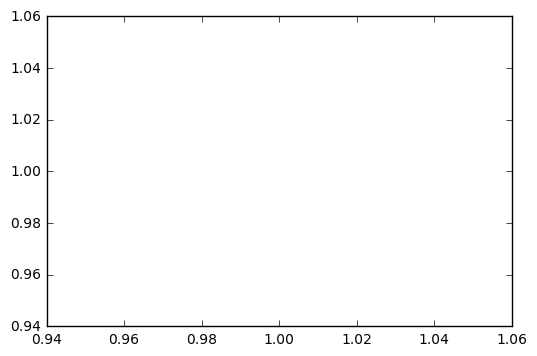

In [9]:
%matplotlib inline
x= y = 1
plt.plot(x, y, linewidth=2.0)

In [ ]:
import pandas
d={'animal':['zebre','chat','dauphin'],
'poids':[225.0,4.1,58.3],
'annees':[38,15,28],
'source':'wikipedia'}
df=pandas.DataFrame(d)



    Utilisez les méthodes d'un setter Line2Dinstance. plotretourne une liste d' Line2Dobjets; ex . Dans le code ci - dessous , nous allons supposer que nous avons une seule ligne de sorte que la liste renvoyée est de longueur 1. Nous utilisons tuple déballage avec pour obtenir le premier élément de cette liste:line1, line2 = plot(x1, y1, x2, y2)line,

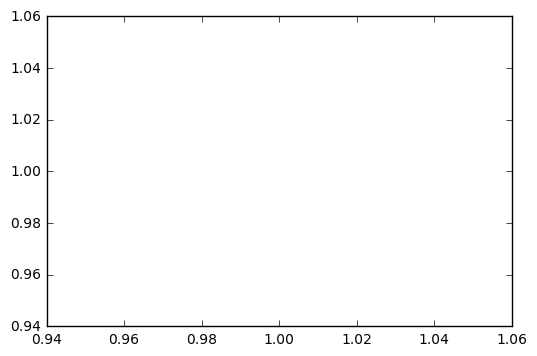

In [10]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising

    Utilisez la setp()commande. L'exemple ci - dessous utilise une commande MATLAB de style pour définir des propriétés multiples sur une liste de lignes. setpfonctionne de manière transparente avec une liste d'objets ou d' un objet unique. Vous pouvez soit utiliser python arguments de mots clés ou des paires chaîne / valeur MATLAB style:

[None, None, None, None]

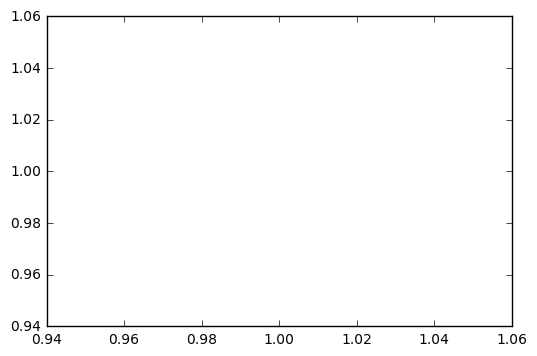

In [12]:
x1 = y1= x2 = y2 = 1
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

Travailler avec plusieurs figures et axes 
MATLAB, et pyplot, ont le concept de la figure actuelle et les axes actuels. Toutes les commandes de traçage sont applicables aux axes actuels. La fonction gca()renvoie les axes actuels (une matplotlib.axes.Axesinstance), et gcf()renvoie le chiffre actuel ( matplotlib.figure.Figureinstance). Normalement, vous ne devez pas vous inquiéter à ce sujet, car il est tout pris en charge dans les coulisses. Ci - dessous est un script pour créer deux sous - parcelles.

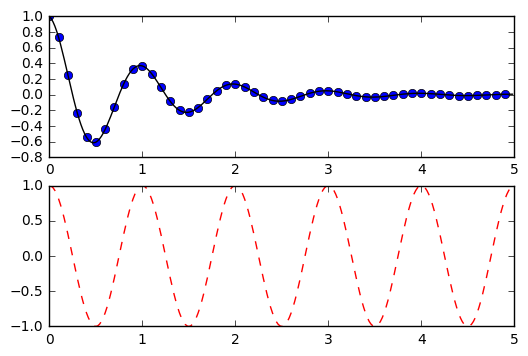

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

La figure()commande ici est facultative car figure(1)sera créé par défaut, tout comme un subplot(111) sera créé par défaut si vous ne spécifiez pas manuellement les axes. La subplot()commande spécifie où va de 1 à . Les virgules dans la commande sont facultatifs si . Donc , est identique à . Vous pouvez créer un nombre arbitraire de sous - parcelles et axes. Si vous voulez placer un axes manuellement, à savoir, non pas sur une grille rectangulaire, utilisez la commande, ce qui vous permet de spécifier l'emplacement que lorsque toutes les valeurs sont en coordonnées fractionnaire (0 à 1). Voir le code pylab_examples exemple: axes_demo.py pour un exemple de placer manuellement les axes et le code pylab_examples exemple: subplots_demo.py pour un exemple avec beaucoup de sous - parcelles.numrows, numcols, fignumfignumnumrows*numcolssubplotnumrows*numcols<10subplot(211)subplot(2, 1, 1)axes()axes([left, bottom, width, height])

Vous pouvez créer plusieurs chiffres en utilisant plusieurs figure()appels avec un nombre croissant de figure. Bien sûr, chaque chiffre peut contenir autant d'axes et intrigues secondaires que votre cœur désire:

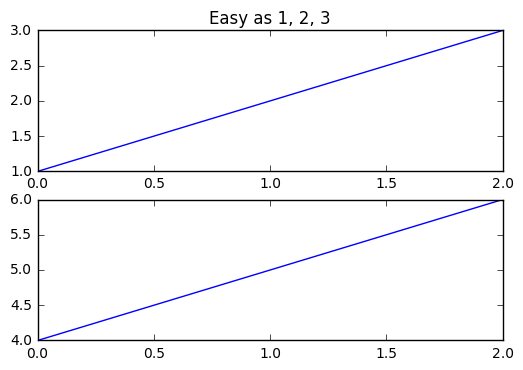

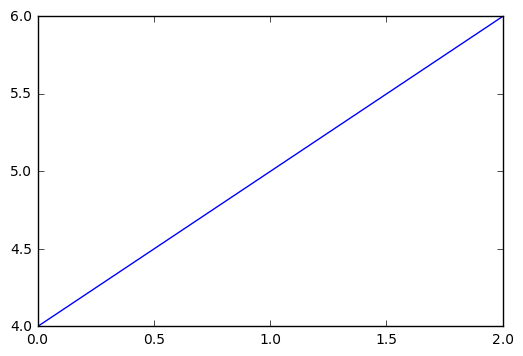

In [14]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

Vous pouvez effacer le chiffre actuel avec clf() et les axes actuels avec cla(). Si vous trouvez qu'il est gênant que les Etats ( en particulier l'image, la figure et axes) sont maintenues pour vous dans les coulisses, ne désespérez pas: ceci est juste une enveloppe stateful mince autour d' un API orientée objet, que vous pouvez utiliser à la place ( voir Artiste tutoriel )

Si vous faites beaucoup de chiffres, vous devez être au courant d'une chose: la mémoire requise pour un chiffre ne soit pas complètement libéré jusqu'à ce que le chiffre soit explicitement fermée avec close(). Suppression de toutes les références à la figure, et / ou en utilisant le gestionnaire de fenêtres pour tuer la fenêtre dans laquelle le chiffre apparaît sur l'écran, ne suffit pas, parce pyplot maintient des références internes jusqu'à ce que l' close() on appelle.

Travailler avec le texte 
La text()commande peut être utilisée pour ajouter du texte dans un emplacement arbitraire, et xlabel(), ylabel()et title() sont utilisés pour ajouter du texte aux endroits indiqués (voir l' introduction du texte pour un exemple plus détaillé)

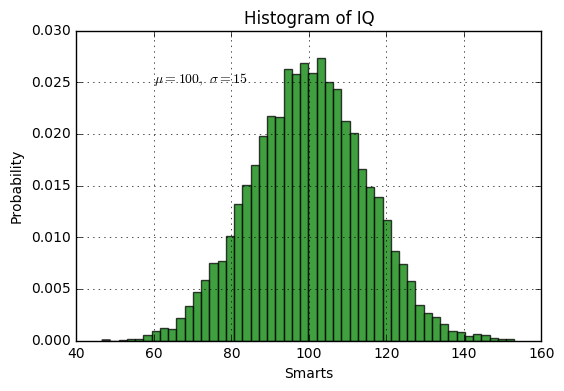

In [15]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Toutes les text()commandes retournent une matplotlib.text.Textinstance. Tout comme avec les lignes ci - dessus, vous pouvez personnaliser les propriétés en passant des arguments dans les fonctions de texte ou en utilisant setp():

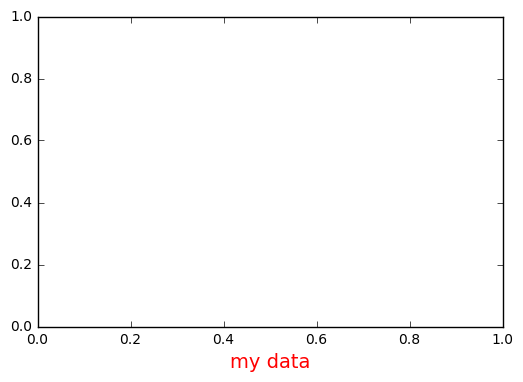

In [16]:
t = plt.xlabel('my data', fontsize=14, color='red')

Ces propriétés sont traitées plus en détail dans les propriétés de texte et mise en page .

Utilisation d' expressions mathématiques dans le texte 
matplotlib accepte TeX expressions de l' équation dans une expression de texte. Par exemple , pour écrire l'expression dans le titre, vous pouvez écrire une expression de TeX entouré par des signes dollar:

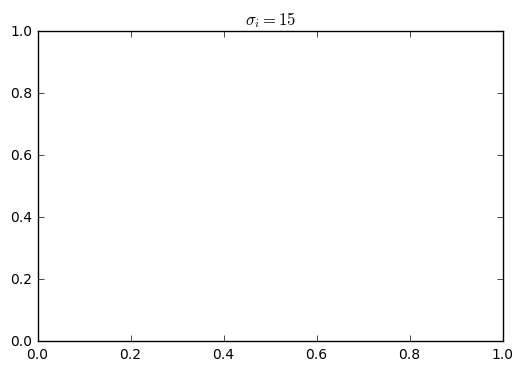

In [17]:
plt.title(r'$\sigma_i=15$')

La rla chaîne de titre qui précède est important - cela signifie que la chaîne est une première chaîne de caractères et de ne pas traiter les antislashs comme échappe python. matplotlib a un analyseur intégré d'expression de TeX et le moteur de mise en page, et les navires de ses propres polices de mathématiques - pour détails , voir Écriture d' expressions mathématiques . Ainsi , vous pouvez utiliser du texte mathématique à travers les plates - formes sans nécessiter une installation de TeX. Pour ceux qui ont LaTeX et dvipng installés, vous pouvez également utiliser LaTeX pour formater votre texte et d' incorporer directement la sortie dans vos chiffres d'affichage ou postscript sauvé - voir le rendu de texte avec LaTeX .

Annotation texte 
Les utilisations de la base text()commande ci - dessus de placer du texte à une position arbitraire sur les axes. Une utilisation courante pour le texte est d'annoter une caractéristique de la parcelle, et la annotate()méthode fournit des fonctionnalités d'aide pour faire des annotations facile. Dans une annotation, il y a deux points à considérer: l'emplacement étant annotée représentés par l'argument xyet l'emplacement du texte xytext. Ces deux arguments sont (x,y)tuples.

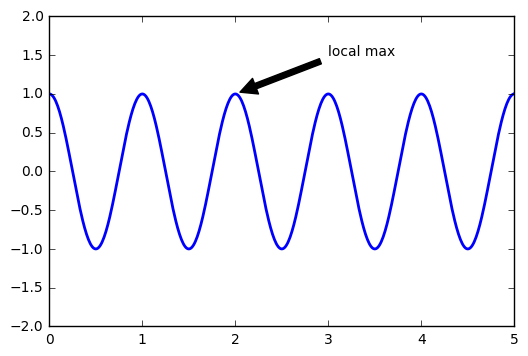

In [18]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

Dans cet exemple de base, à la fois le xy(pointe de la flèche) et des xytext emplacements (emplacement de texte) sont en coordonnées de données. Il existe une variété d'autres systèmes de coordonnées , on peut choisir - voir Annotation texte et Annotation Haches pour plus de détails. D' autres exemples peuvent être trouvés dans le code pylab_examples exemple: annotation_demo.py .

Logarithmiques et autre axe non linéaire 
matplotlib.pyplotsoutient non seulement les échelles des axes linéaires, mais aussi des échelles logarithmiques et logit. Ceci est généralement utilisé si les données couvre plusieurs ordres de grandeur. Modification de l'échelle d'un axe est facile:

plt.xscale ( «log»)
Un exemple de quatre parcelles avec les mêmes données et différentes échelles pour l'axe y est représenté ci-dessous.

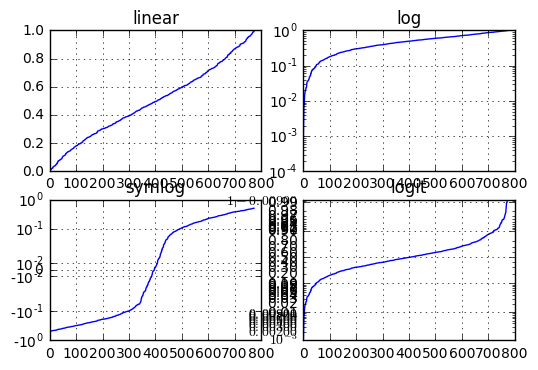

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()

Il est également possible d'ajouter votre propre échelle, voir Ajout de nouvelles échelles et projections à matplotlib pour plus de détails.